In [11]:
import os
import sys
import subprocess
import numpy as np
import seaborn as sns
import json
import pandas as pd
import shutil
import librosa.display
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
# %config InlineBackend.figure_format = 'svg' 
from pycaret.classification import *

In [15]:
df = pd.read_csv("/home/abhijeet/Desktop/extracted/train2.csv")
df.head()

,id,path,date,status,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,iOx0zPyPiMZjCWXuf3RGu8HKq8k1,/home/abhijeet/Desktop/extracted/20210630/iOx0...,20210630,positive,0.571208,0.017260,1816.135002,1825.064974,3654.356836,0.329156,...,-5.987736,-6.044026,-10.262712,-7.170579,-3.980177,-5.199104,-4.095163,-1.385846,-4.265814,-3.388773
1,gFmySpqfQ7YrYqMrmrMPO7AzmBm1,/home/abhijeet/Desktop/extracted/20210630/gFmy...,20210628,positive,0.485491,0.055333,1803.227275,1514.007823,3375.087099,0.179753,...,0.848334,-10.802448,0.471163,-0.685309,-12.754487,-6.946540,-6.162850,-7.796247,-6.396797,-4.871747
2,padXEGczMRRKmLRVc68rEKI142B3,/home/abhijeet/Desktop/extracted/20210630/padX...,20210628,positive,0.575894,0.031052,2309.826271,1891.974883,4314.941977,0.260138,...,-4.543019,-6.780571,-3.648542,-5.524356,-4.748296,-5.530713,-5.959706,-5.688097,-4.610028,-3.440410
3,ymX9t6DWDHZTs28MODDSxDaOj4n2,/home/abhijeet/Desktop/extracted/20210630/ymX9...,20210628,positive,0.525386,0.044825,2033.952673,1637.164773,3715.567276,0.289644,...,-1.146640,-4.293538,1.291801,-6.491752,-4.877913,0.042963,-6.877393,-1.274811,2.375689,-2.818016
4,loK2K444HrZUD8Plzr6q3i8y4Xg1,/home/abhijeet/Desktop/extracted/20210630/loK2...,20210628,positive,0.571209,0.041385,2294.375713,1698.955349,4093.764134,0.247430,...,-4.286937,-5.298672,-0.054777,-3.501513,-3.407240,-6.497522,-4.536685,-4.217173,-7.038527,-3.456792


In [16]:
tdf = df.drop(['id','path','date'],axis =1 )
tdf.head()

,status,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,positive,0.571208,0.017260,1816.135002,1825.064974,3654.356836,0.329156,-483.492584,58.155170,-2.718263,...,-5.987736,-6.044026,-10.262712,-7.170579,-3.980177,-5.199104,-4.095163,-1.385846,-4.265814,-3.388773
1,positive,0.485491,0.055333,1803.227275,1514.007823,3375.087099,0.179753,-369.920105,77.721184,-43.531815,...,0.848334,-10.802448,0.471163,-0.685309,-12.754487,-6.946540,-6.162850,-7.796247,-6.396797,-4.871747
2,positive,0.575894,0.031052,2309.826271,1891.974883,4314.941977,0.260138,-482.871155,53.619247,-17.301470,...,-4.543019,-6.780571,-3.648542,-5.524356,-4.748296,-5.530713,-5.959706,-5.688097,-4.610028,-3.440410
3,positive,0.525386,0.044825,2033.952673,1637.164773,3715.567276,0.289644,-410.733032,44.620586,-28.204554,...,-1.146640,-4.293538,1.291801,-6.491752,-4.877913,0.042963,-6.877393,-1.274811,2.375689,-2.818016
4,positive,0.571209,0.041385,2294.375713,1698.955349,4093.764134,0.247430,-440.584259,74.668716,-45.951244,...,-4.286937,-5.298672,-0.054777,-3.501513,-3.407240,-6.497522,-4.536685,-4.217173,-7.038527,-3.456792


In [17]:
eda = setup(data= tdf , target = 'status', session_id = 123)

,Description,Value
0,session_id,123
1,Target,status
2,Target Type,Binary
3,Label Encoded,"negative: 0, positive: 1"
4,Original Data,"(2277, 27)"
5,Missing Values,0
6,Numeric Features,26
7,Categorical Features,0
8,Ordinal Features,0
9,High Cardinality Features,0


In [19]:
best = compare_models(sort='AUC',fold =10,n_select=10) 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7960,0.7181,0.0846,0.7242,0.1493,0.1095,0.1945,0.0850
lightgbm,Light Gradient Boosting Machine,0.8092,0.7123,0.2513,0.6528,0.3602,0.2732,0.3176,0.0850
qda,Quadratic Discriminant Analysis,0.7633,0.7068,0.4327,0.4480,0.4393,0.2897,0.2902,0.0060
rf,Random Forest Classifier,0.7985,0.7002,0.1139,0.6700,0.1933,0.1418,0.2155,0.1710
gbc,Gradient Boosting Classifier,0.8035,0.6923,0.2017,0.6321,0.3022,0.2234,0.2740,0.2390
lda,Linear Discriminant Analysis,0.7878,0.6899,0.1229,0.5628,0.1962,0.1271,0.1778,0.0190
ada,Ada Boost Classifier,0.7809,0.6798,0.2339,0.4852,0.3103,0.1998,0.2204,0.0860
nb,Naive Bayes,0.7231,0.6675,0.3803,0.3688,0.3718,0.1958,0.1968,0.0040
lr,Logistic Regression,0.7828,0.6559,0.0615,0.4633,0.1072,0.0602,0.1015,0.0810
dt,Decision Tree Classifier,0.7024,0.5696,0.3303,0.3202,0.3239,0.1340,0.1344,0.0130


In [20]:
best

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=123, verbose=0,
                      warm_start=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
                subsample=1.0, subsample_for_bin=200000, subsample_freq

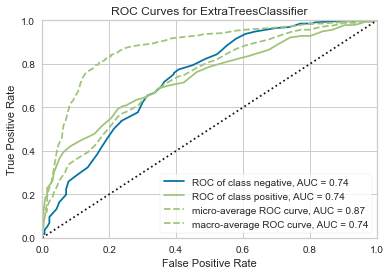

In [21]:
plot_model( estimator = best[0])

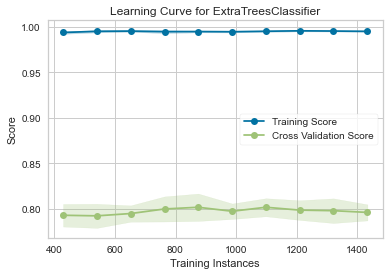

In [22]:
plot_model(best[0],'learning')

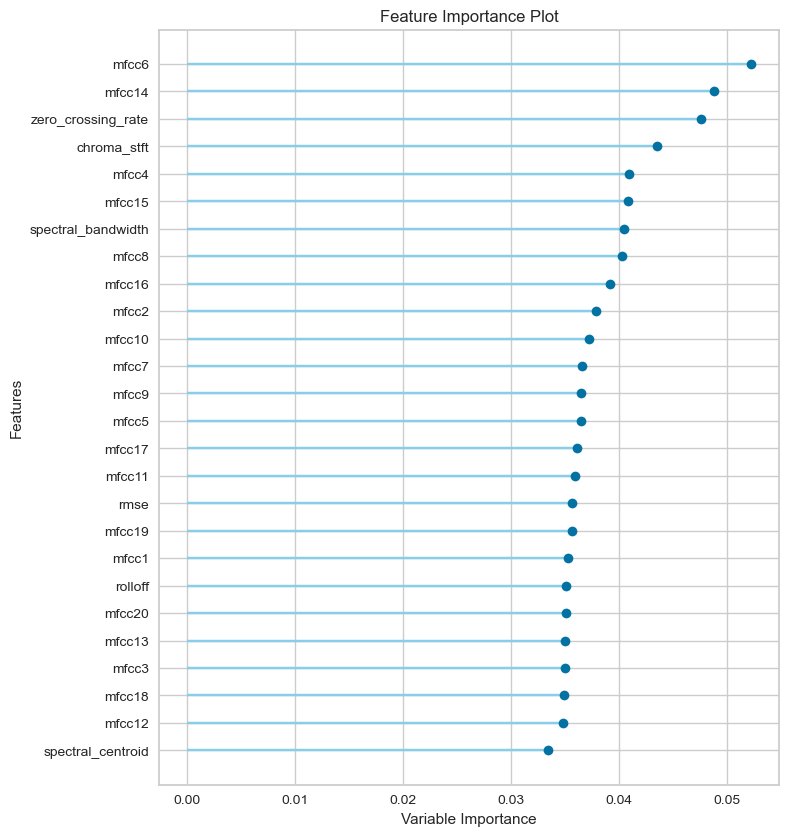

In [23]:
plot_model(best[0],'feature_all')